In [ ]:
#Maksym Zawrotny st. III stopnia, semestr III

#W pliku pd4. xmlsznajduje sięarkusz w exelu z danymi medycznymi.
#Istotne parametry mają nazwy od p1 do p11.
#Jeśli wartość parametru wynosi -1,0 to oznacza brak danych, 
#tzn. dane te nie powinny być wizualizowane i uwzględniane w obliczeniach statystycznych.
#W ostatniejkolumniezaznaczonoczy pacjent jest zdrowy (0), czy chory (1).
#Proszę napisać program, który:-wczytuje arkusz kalkulacyjny-
#w graficznych plikach wyjściowych zapisuje wizualizację par parametrów:
#(np.oś X=p1,oś Y=p2)(bez -1.0).
#Pary dla osób chorych(ostatnia kolumna=1)mają inny kolor niż dla osób zdrowych.
#Dodatkowo generowany jest plik tekstowy z obliczonymi wskaźnikami statystycznymi:
#Dla każdego parametru i dla każdej grupy pacjentów(0,1)wypisywana jest wartość oczekiwana iwariancja.
#Dla każdej pary parametrów i każdej grupy chorych –współczynnik Pearsona.
#Zapisane wyników w formie arkusza Exela będziedodatkowo punktowane

In [4]:
#import danych statystycznych z dysku lokalnego
import pandas as pd
data_df = pd.read_excel('C:\\Users\\Maks\\source\\Py_source\\PD_4\\pd4.xlsx')

#zapisanie danych do przenośnej paczki w celu 
#uzyskania reprodukowalności kodu
import dill
with open('raw_data.pkl', 'wb') as f:
    dill.dump(data_df, f)

In [5]:
#Od tego cell należy wykonywać program,pod warunkiem że paczka
#raw_data.pkl znajduje się w tym samym katalogu co notebook

#import pierwotnych danych
import dill
with open('raw_data.pkl', 'rb') as f:
    raw_data = dill.load(f)

In [58]:

def plot_pair(dataset, param1, param2, out_file):
    """
        Funkcja generująca wykres pary parametrów i zapisująca do pliku
        argumenty:
            dataset: zbiór danych
            param1: nazwa kolumny na osi X
            param2: nazwa kolumny na osi Y
            out_file: nazwa bądź ścieżka pliku wyjściowego
                    w formacie wspieranym przez pyplot.savefig()
    """
    import matplotlib.pyplot as plt
    data_mini = dataset[[param1, param2, 'wynik']]
# nie działa więc szeregowo:data_mini = data_mini[data_mini[param1] != -1 and data_mini[param2] != -1]
    data_mini = data_mini[data_mini[param1] != -1]
    data_mini = data_mini[data_mini[param2] != -1]
    
    plt.plot(data_mini[param1][data_mini['wynik'] == 0], 
             data_mini[param2][data_mini['wynik'] == 0], 
             'g.', label='pacjenci zdrowi')
    
    plt.plot(data_mini[param1][data_mini['wynik'] == 1], 
             data_mini[param2][data_mini['wynik'] == 1], 
             'r.', label='pacjenci chorzy')
    
    plt.legend()
    plt.savefig(out_file)

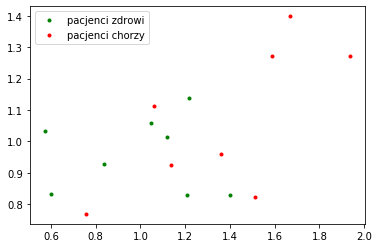

In [60]:
#zamieszaczam przykładowe wywołania, nie ma sensy chyba
#na potrzeby dydaktyczne tworząc 11C2 = 55 wykresów
plot_pair(raw_data, 'p5', 'p2', 'fig1.jpeg')

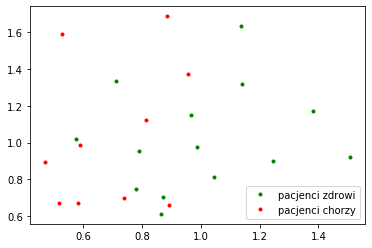

In [61]:
plot_pair(raw_data, 'p7', 'p1', 'fig2.jpeg')

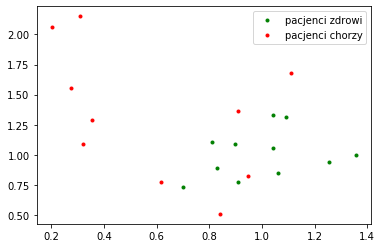

In [62]:
plot_pair(raw_data, 'p9', 'p8', 'fig3.jpeg')

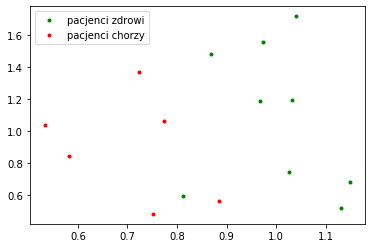

In [63]:
plot_pair(raw_data, 'p6', 'p3', 'fig4.jpeg')

In [158]:
#tutaj odbywa się przetwarzanie danych
#wymagane wcześniejsze zaimportowanie raw_Data
#w wyniku powstanie arkusz summary.xlsx
import pandas as pd
import numpy as np
data_healthy = raw_data[raw_data.wynik == 0]
data_ill = raw_data[raw_data.wynik == 1]

data_healthy = data_healthy.replace(-1, np.NaN)
data_ill = data_ill.replace(-1, np.NaN)

mean_0 = data_healthy.mean(axis=0, skipna=True)[:-1]
mean_1 = data_ill.mean(axis=0, skipna=True)[:-1]

var_0 = data_healthy.var(axis=0, skipna=True)[:-1]
var_1 = data_ill.var(axis=0, skipna=True)[:-1]

corr_0 = data_healthy.corr(method='pearson').drop(index='wynik', columns='wynik')
corr_0.columns = corr_0.columns + '_pearson_0'
corr_1 = data_healthy.corr(method='pearson').drop(index='wynik', columns='wynik')
corr_1.columns = corr_1.columns + '_pearson_1'

summary = pd.DataFrame()
summary.insert(loc=0, column='mean_0', value=mean_0)
summary.insert(loc=1, column='mean_1', value=mean_1)
summary.insert(loc=2, column='var_0', value=var_0)
summary.insert(loc=3, column='var_1', value=var_1)
summary_list = [summary, corr_0, corr_1]
summary = pd.concat(summary_list, axis=1, sort=False)

summary.to_excel('summary.xlsx')